---
# 시간대별 대중교통과 따릉이 이용량 비교 (정규화)

- 이 노트북에서는 **`bus_hourly_summary_total_with_date_period.csv`**, **`subway_hourly_summary_total_with_date_period.csv`**, **`bike_rental_summary.csv`** 데이터를 사용하여 **버스**, **지하철**, **따릉이**의 시간대별 이용량을 비교합니다.  
- 이 데이터는 각 시간대에 대한 **이용객 수**를 기반으로 하여, **정규화**된 값으로 시각화합니다.

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# -------------------------------
# [1] 데이터 불러오기
# -------------------------------

# 각 파일을 불러옵니다
df_bus = pd.read_csv("../data/bus_hourly_summary_total_with_date_period.csv")
df_subway = pd.read_csv("../data/subway_hourly_summary_total_with_date_period.csv")
df_bike = pd.read_csv("../data/bike_rental_summary.csv")

# -------------------------------
# [2] 데이터 확인 및 디버깅
# -------------------------------

# 버스, 지하철, 따릉이 데이터의 첫 5개 데이터 확인
print("[Bus Data] 첫 5개 데이터 확인:")
print(df_bus.head())

print("\n[Subway Data] 첫 5개 데이터 확인:")
print(df_subway.head())

print("\n[Bike Data] 첫 5개 데이터 확인:")
print(df_bike.head())

# -------------------------------
# [3] 시간대별 이용객 수 합산
# -------------------------------

# 1. 버스 데이터: 시간대별 총합 계산
df_bus_sum = df_bus.groupby('hour_of_day')['bus_count'].sum().reset_index()

# 2. 지하철 데이터: 시간대별 총합 계산
df_subway_sum = df_subway.groupby('hour_of_day')['subway_count'].sum().reset_index()

# 3. 따릉이 데이터: 시간대별 대여량 합산
# `bike_rental_summary.csv`에서 'hour_of_day'가 이미 존재하므로 이를 기준으로 대여량 합산
df_bike_sum = df_bike.groupby('hour_of_day')['bike_count'].sum().reset_index()

[Bus Data] 첫 5개 데이터 확인:
  date_period  hour_of_day  bus_count
0    2024-01-            0  1705143.0
1    2024-01-            1   440101.0
2    2024-01-            2   262036.0
3    2024-01-            3   227151.0
4    2024-01-            4  1297144.0

[Subway Data] 첫 5개 데이터 확인:
   date_period  hour_of_day  subway_count
0       202401            0     1078293.0
1       202401            1       33562.0
2       202401            2          17.0
3       202401            3           0.0
4       202401            4       31374.0

[Bike Data] 첫 5개 데이터 확인:
  date_period  hour_of_day  dong    gu  bike_count
0     2024-01            0  가락2동   송파구       411.0
1     2024-01            0  가리봉동   구로구        11.0
2     2024-01            0   가산동   금천구       218.0
3     2024-01            0  가양2동   강서구       189.0
4     2024-01            0  가정1동  서대문구       114.0


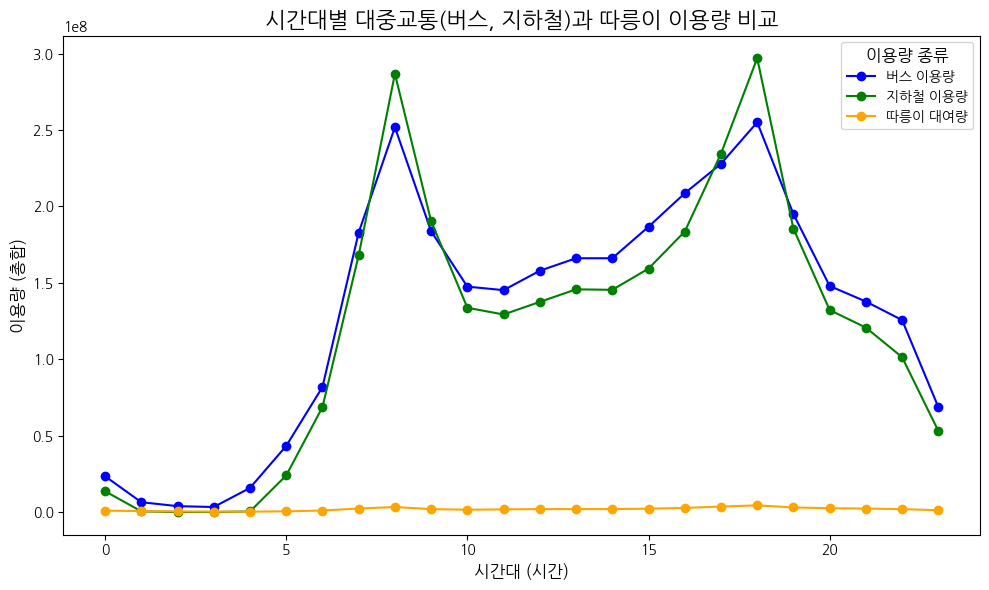

In [5]:
# -------------------------------
# [4] 그래프 그리기
# -------------------------------

# 시간대별 총 이용객 수 그래프
fig, ax = plt.subplots(figsize=(10, 6))

# 버스, 지하철, 따릉이 이용객 수 시간대별 시각화
ax.plot(df_bus_sum['hour_of_day'], df_bus_sum['bus_count'], label='버스 이용량', marker='o', color='blue')
ax.plot(df_subway_sum['hour_of_day'], df_subway_sum['subway_count'], label='지하철 이용량', marker='o', color='green')
ax.plot(df_bike_sum['hour_of_day'], df_bike_sum['bike_count'], label='따릉이 대여량', marker='o', color='orange')

# 그래프 꾸미기
ax.set_title('시간대별 대중교통(버스, 지하철)과 따릉이 이용량 비교', fontsize=16)
ax.set_xlabel('시간대 (시간)', fontsize=12)
ax.set_ylabel('이용량 (총합)', fontsize=12)
ax.legend(title='이용량 종류', fontsize=10, title_fontsize=12)

# 그래프 레이아웃 설정
plt.tight_layout()
plt.show()

[Bus Data] 첫 5개 데이터 확인:
  date_period  hour_of_day  bus_count
0    2024-01-            0  1705143.0
1    2024-01-            1   440101.0
2    2024-01-            2   262036.0
3    2024-01-            3   227151.0
4    2024-01-            4  1297144.0

[Subway Data] 첫 5개 데이터 확인:
   date_period  hour_of_day  subway_count
0       202401            0     1078293.0
1       202401            1       33562.0
2       202401            2          17.0
3       202401            3           0.0
4       202401            4       31374.0

[Bike Data] 첫 5개 데이터 확인:
  date_period  hour_of_day  dong    gu  bike_count
0     2024-01            0  가락2동   송파구       411.0
1     2024-01            0  가리봉동   구로구        11.0
2     2024-01            0   가산동   금천구       218.0
3     2024-01            0  가양2동   강서구       189.0
4     2024-01            0  가정1동  서대문구       114.0


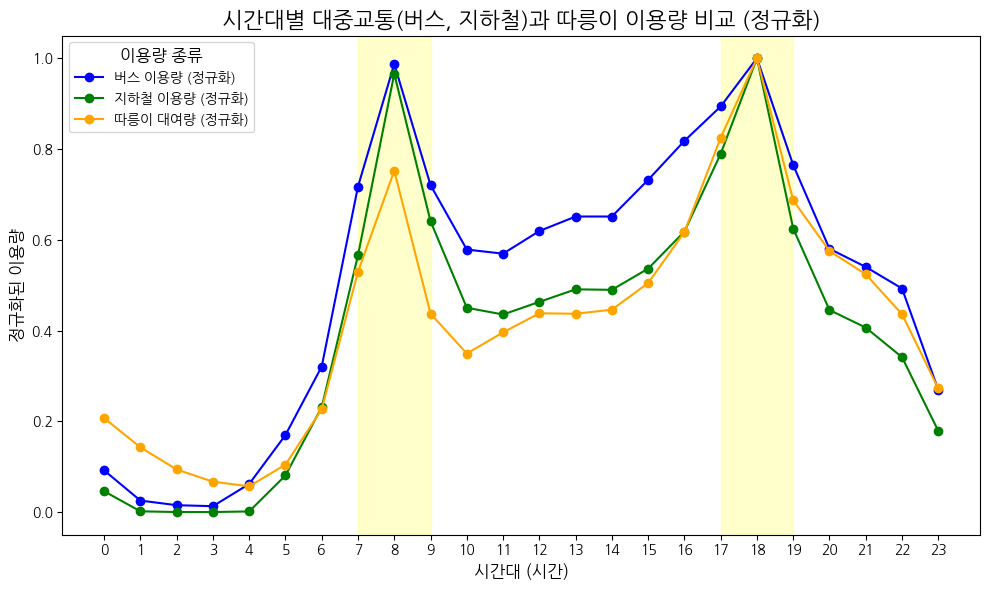

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# [1] 데이터 불러오기
# -------------------------------

# 각 파일을 불러옵니다
df_bus = pd.read_csv("../data/bus_hourly_summary_total_with_date_period.csv")
df_subway = pd.read_csv("../data/subway_hourly_summary_total_with_date_period.csv")
df_bike = pd.read_csv("../data/bike_rental_summary.csv")  # 따릉이 데이터

# -------------------------------
# [2] 데이터 확인 및 디버깅
# -------------------------------

# 버스, 지하철, 따릉이 데이터의 첫 5개 데이터 확인
print("[Bus Data] 첫 5개 데이터 확인:")
print(df_bus.head())

print("\n[Subway Data] 첫 5개 데이터 확인:")
print(df_subway.head())

print("\n[Bike Data] 첫 5개 데이터 확인:")
print(df_bike.head())

# -------------------------------
# [3] 시간대별 이용객 수 합산
# -------------------------------

# 1. 버스 데이터: 시간대별 총합 계산
df_bus_sum = df_bus.groupby('hour_of_day')['bus_count'].sum().reset_index()

# 2. 지하철 데이터: 시간대별 총합 계산
df_subway_sum = df_subway.groupby('hour_of_day')['subway_count'].sum().reset_index()

# 3. 따릉이 데이터: 시간대별 대여량 합산
# `bike_rental_summary.csv`에서 'hour_of_day'가 이미 존재하므로 이를 기준으로 대여량 합산
df_bike_sum = df_bike.groupby('hour_of_day')['bike_count'].sum().reset_index()

# -------------------------------
# [4] 데이터 정규화
# -------------------------------

# 각 데이터프레임에 대해 정규화 처리 (최대값으로 나누어 0~1 범위로 변환)
df_bus_sum['bus_count'] = df_bus_sum['bus_count'] / df_bus_sum['bus_count'].max()
df_subway_sum['subway_count'] = df_subway_sum['subway_count'] / df_subway_sum['subway_count'].max()
df_bike_sum['bike_count'] = df_bike_sum['bike_count'] / df_bike_sum['bike_count'].max()

# -------------------------------
# [5] 그래프 그리기
# -------------------------------

# 시간대별 총 이용객 수 그래프
fig, ax = plt.subplots(figsize=(10, 6))

# 정규화된 버스, 지하철, 따릉이 이용객 수 시간대별 시각화
ax.plot(df_bus_sum['hour_of_day'], df_bus_sum['bus_count'], label='버스 이용량 (정규화)', marker='o', color='blue')
ax.plot(df_subway_sum['hour_of_day'], df_subway_sum['subway_count'], label='지하철 이용량 (정규화)', marker='o', color='green')
ax.plot(df_bike_sum['hour_of_day'], df_bike_sum['bike_count'], label='따릉이 대여량 (정규화)', marker='o', color='orange')

# 출퇴근 시간대 (07:00-09:00, 17:00-19:00) 하이라이트
ax.axvspan(7, 9, color='yellow', alpha=0.2)
ax.axvspan(17, 19, color='yellow', alpha=0.2)

# 그래프 꾸미기
ax.set_title('시간대별 대중교통(버스, 지하철)과 따릉이 이용량 비교 (정규화)', fontsize=16)
ax.set_xlabel('시간대 (시간)', fontsize=12)
ax.set_ylabel('정규화된 이용량', fontsize=12)
ax.legend(title='이용량 종류', fontsize=10, title_fontsize=12)

# x축에 시간대 (1시간 단위) 추가
ax.set_xticks(range(0, 24))
ax.set_xticklabels([f"{i}" for i in range(24)])

# 그래프 레이아웃 설정
plt.tight_layout()
plt.show()
